In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_datasets as tfds
from tensorflow import keras

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
pixels=np.array(train_images)
pixels

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
pixels.max()

255

In [ ]:
train_data=train_images/255  ##Scaling the features
test_data=test_images/255

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  #Pixel size of each picture as input
    keras.layers.Dense(300, activation='relu'),  #Hidden layer 1
    keras.layers.Dense(150, activation='softmax'),  #Hidden layer 2
    keras.layers.Dense(10)                       #Output layer
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_data, train_labels, epochs=15, validation_split=0.15)

Epoch 1/15
1594/1594 [==============================] - 7s 4ms/step - loss: 1.4951 - accuracy: 0.6159 - val_loss: 1.0462 - val_accuracy: 0.6518
Epoch 2/15
1594/1594 [==============================] - 7s 4ms/step - loss: 0.9106 - accuracy: 0.6611 - val_loss: 0.8165 - val_accuracy: 0.6663
Epoch 3/15
1594/1594 [==============================] - 7s 4ms/step - loss: 0.7549 - accuracy: 0.6835 - val_loss: 0.7092 - val_accuracy: 0.7076
Epoch 4/15
1594/1594 [==============================] - 7s 4ms/step - loss: 0.6494 - accuracy: 0.7601 - val_loss: 0.6092 - val_accuracy: 0.7856
Epoch 5/15
1594/1594 [==============================] - 7s 4ms/step - loss: 0.5589 - accuracy: 0.8070 - val_loss: 0.5536 - val_accuracy: 0.8146
Epoch 6/15
1594/1594 [==============================] - 7s 4ms/step - loss: 0.5017 - accuracy: 0.8286 - val_loss: 0.5084 - val_accuracy: 0.8399
Epoch 7/15
1594/1594 [==============================] - 7s 4ms/step - loss: 0.4650 - accuracy: 0.8388 - val_loss: 0.4961 - val_accuracy:

In [ ]:
test_loss, test_acc=model.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4352 - accuracy: 0.8602


In [ ]:
predictions=model.predict(test_data)

In [ ]:
predictions

array([[ -5.7565265,  -5.6776123,  -5.3667665, ...,  -0.702315 ,
         -4.962289 ,   4.2393665],
       [ -6.464647 , -11.232096 ,   4.44121  , ...,  -9.121806 ,
         -4.3825607,  -8.604995 ],
       [ -8.60385  ,   6.4406886,  -8.405236 , ...,  -7.989578 ,
         -5.125112 ,  -7.588269 ],
       ...,
       [ -1.8046857,  -5.4962893,  -2.8328192, ...,  -2.7767184,
          5.0975137,  -3.7474742],
       [ -8.603036 ,   6.4379444,  -8.40368  , ...,  -7.9893575,
         -5.1247597,  -7.588111 ],
       [ -4.318435 ,  -5.297908 ,  -4.041876 , ...,  -1.7183414,
         -3.7237513,  -2.4356406]], dtype=float32)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
class_names[np.argmax(predictions[0])] #prediction

'Ankle boot'

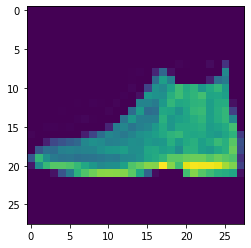

In [ ]:
plt.imshow(test_data[0])

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

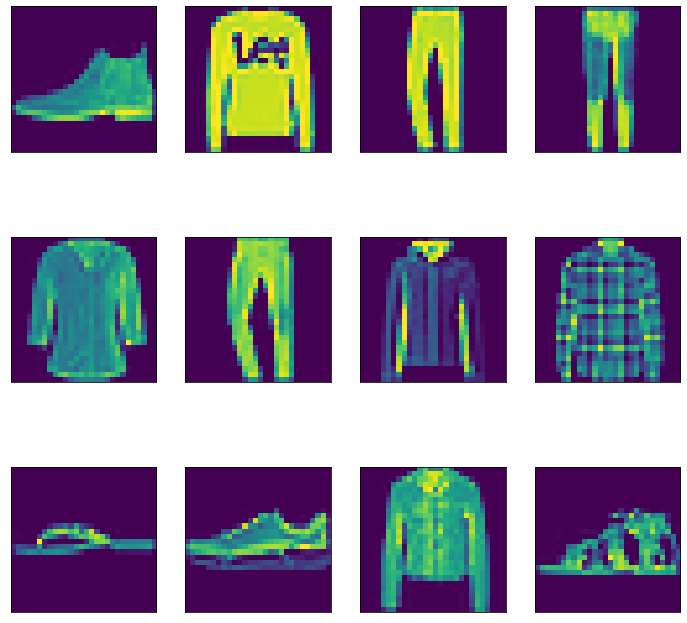

In [ ]:
plt.figure(figsize=(12,12))
for i in range(12):
  plt.subplot(3,4,i+1)
  plt.xticks([]),
  plt.yticks([]),
  plt.imshow(test_data[i])
plt.show()